In [2]:
import matplotlib.pyplot as plt
import matplotlib
import json_tricks as json
import pandas as pd
import numpy as onp

In [3]:
results_path = "../../experiments/results/"

In [4]:
# set up exporting
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'pgf.rcfonts': False,
#     'axes.unicode_minus': False, # avoid unicode error on saving plots with negative numbers (??)
# })

# figure_path = "/home/lauro/documents/msc-thesis/thesis/figures/"
figure_path = "/home/lauro/documents/msc-thesis/paper/latex/figures/"
standard_figsize = [6, 4]
# save figures by using plt.savefig('title of figure')
# remember that latex textwidth is 5.4in
# so use figsize=[5.4, 4], for example

# SD maxing

In [5]:
results = json.load(results_path + "sd_maxing.json")

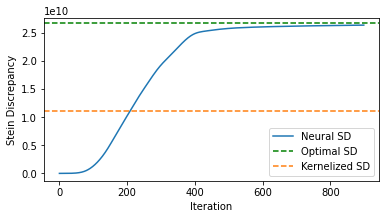

In [6]:
# PDF
%matplotlib inline
plt.subplots(figsize=[6, 3])

plt.plot(results['Neural_SD'], label="Neural SD")
plt.axhline(results['Optimal_SD'], linestyle="--", color="green", label="Optimal SD")
plt.axhline(results['KSD'], linestyle="--", color="tab:orange", label="Kernelized SD")

plt.ylabel("Stein Discrepancy")
plt.xlabel("Iteration")
plt.legend()
# plt.yscale("log")
# plt.savefig(figure_path + "sd_maxing.pdf", bbox_inches='tight')

# Funnel MMD comparison

In [14]:
results = json.load(results_path + "funnel-mmd-comparison.json")

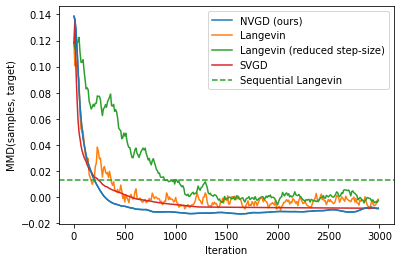

In [17]:
%matplotlib inline
plt.subplots(figsize=standard_figsize)
end_idx = 300

names = ["NVGD (ours)", "Langevin", "Langevin (reduced step-size)", "SVGD"]
for label, v in zip(names, results.values()):
    plt.plot(*zip(*v[:end_idx]), label=label)

plt.plot(*zip(*results['NVGD'][:end_idx]), color='tab:blue') # NVGD is on top


plt.axhline(y=results['sequential'], linestyle="--", color="tab:green", label="Sequential Langevin")  # TODO replace value copied from old plot

plt.xlabel("Iteration")
plt.ylabel("MMD(samples, target)")
plt.legend()

# plt.savefig(figure_path + "funnel_mmd.pdf", bbox_inches='tight')

# Funnel MMD scatter

In [9]:
results = json.load(results_path + "funnel-scatter.json")
results.keys()

odict_keys(['NVGD', 'SGLD', 'true'])

No handles with labels found to put in legend.


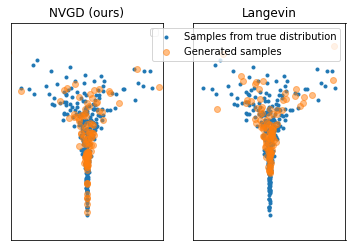

In [13]:
%matplotlib inline
fig, axs = plt.subplots(1, 2, figsize=standard_figsize)
titles = ("NVGD (ours)", "Langevin")
sample_list = list(results.values())[:2]
target_samples = onp.array(results['true'])

for samples, ax, title in zip(sample_list, axs.flatten(), titles):
    samples = onp.array(samples)
    # labels
    l1 = "Samples from true distribution" if title=="Langevin" else None
    l2 = "Generated samples" if title=="Langevin" else None
    ax.set_xticks([])
    ax.set_yticks([])
#     ax.tick_params()
    ax.scatter(*onp.rollaxis(target_samples, 1), alpha=1, marker=".", label=l1)
    ax.scatter(*onp.rollaxis(samples, 1), alpha=0.5, marker="o", label=l2)
    ax.legend()
    ax.set_title(title)
    ax.set(xlim=(-15, 15), ylim=(-10, 10))

plt.savefig(figure_path + "funnel_scatter.pdf", bbox_inches='tight')

# Funnel MMD dimension sweep

In [10]:
results = json.load(results_path + "funnel-dimension-sweep.json")

names = list(results.keys())
names[0] = "NVGD"

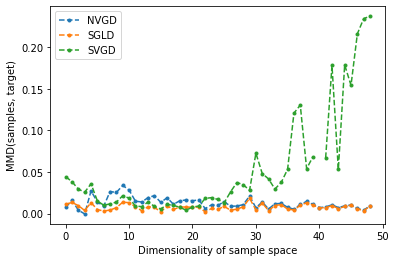

In [11]:
# PDF
%matplotlib inline
plt.subplots(figsize=standard_figsize)

for name, mmds in zip(names, results.values()):
    plt.plot(mmds, "--.", label=name)

plt.ylabel("MMD(samples, target)")
plt.xlabel("Dimensionality of sample space")
plt.legend()
# plt.yscale("log")
# plt.savefig(figure_path + "funnel-dimension-sweep.pdf", bbox_inches='tight')

# Bayesian logistic regression

In [12]:
results = json.load(results_path + "covertype-regression.json")

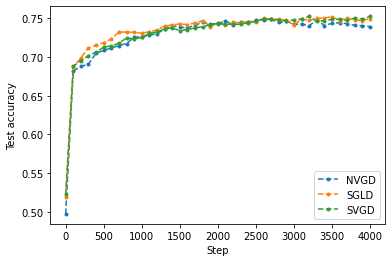

In [13]:
# copied from nb
%matplotlib inline
plt.subplots(figsize=standard_figsize)
names = ["NVGD", "SGLD", "SVGD"]
spaced_grid = onp.arange(0, 4001, step=100)
for name, accuracy in zip(names, results.values()):
    plt.plot(spaced_grid, accuracy, "--.", label=name)

plt.ylabel("Test accuracy")
plt.xlabel("Step")
plt.legend()
# plt.savefig(figure_path + "covtype.pdf", bbox_inches='tight')

# Bayesian neural network

In [32]:
bnn_path = '/home/lauro/code/msc-thesis/main/notebooks/bayesian-neural-network/'
sgd_results = [json.load(bnn_path + f + '/rundata.json') for f in ('nvgd', 'sgld', 'svgd')]
adam_results = [json.load(bnn_path + f + '/adam_rundata.json') for f in ('nvgd', 'svgd')]

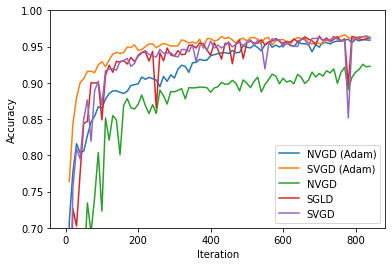

In [36]:
plt.subplots(figsize=standard_figsize)

labels = ['NVGD (Adam)', 'SVGD (Adam)']
for rundata, label in zip(adam_results, labels):
    plt.plot(*zip(*rundata['accuracy']), label=label)

labels = ['NVGD', 'SGLD', 'SVGD']
for rundata, label in zip(sgd_results, labels):
    plt.plot(*zip(*rundata['accuracy']), label=label)

plt.ylim((.7, 1))

plt.ylabel("Accuracy")
plt.xlabel("Iteration")
plt.legend()
# plt.yscale("log")
# plt.savefig(figure_path + "bnn.pdf", bbox_inches='tight')